# Bank Telemarketing with Machine Learning Classifier Model

## Problem Statement
Bank telemarketing pada umumnya dimanfaatkan untuk meningkatkan loyalitas pelanggan. Dalam pengambilan keputusan bisnis, dibutuhkan inteligensi bisnis yang merupakan proses penting untuk menganalisis data dan menyajikan informasi yang dapat ditindaklanjuti untuk membantu end users suatu perusahaan seperti eksekutif, manajer, dsb. Untuk mengetahui apakah suatu pelanggan akan menggunakan produk atau jasa dari bank telemarketing, akan dipilih nasabah yang berlangganan deposito berjangka untuk memaksimalkan pemasaran yang sedang berjalan. Maka dari itu, dibutuhkan suatu model prediksi untuk memprediksi apakah nasabah berlangganan deposito berjangka atau tidak, untuk menentukan kesuksesan bank telemarketing.

## Objective
- Menganalisis karakteristik dari nasabah pemilik rekening koran pada Bank Portugal
- Menentukan waktu terbaik untuk melakukan pemasaran via telepon (telemarketing)
- Menentukan dan menganalisa hasil algoritma machine learning terbaik yang dapat mengklasifikasikan pelanggan untuk kegiatan bank telemarketing
- Melakukan tuning terhadap model yang dihasilkan guna memaksimalkan target sumber daya marketing dan mengurangi resiko kegilangan target marketing dengan mengidentifikasi nasabah yang akan berlangganan deposito berjangka dan dengan demikian mengarahkan upaya pemasaran kepada mereka (hasil evaluasi dari f1-score)
- Menganalisis apa yang bisa dilakukan untuk improvisasi model selanjutnya

## Data
Data yang digunakan adalah Bank Marketing dataset yang didapat dari UCI Machine Learning Repository.\
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Import Libraries

In [434]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from matplotlib import image as mpimg
import outlier_func
%matplotlib inline

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score

## Data Loading

In [83]:
# Loading and viewing all the data
df_ori=pd.read_csv('m2/bank-full.csv', sep=';')
df=df_ori.copy()

# viewing the head of the data
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [9]:
# viewing the tail of the data
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
# Viewing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


__Metadata Attribute Information__

=== bank client data ===
1.  age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
\
\
=== related with the last contact of the current campaign ===
9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: last contact day of the month
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
\
\
=== other attributes ===
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
\
Output variable (desired target):
17. y. has the client subscribed a term deposit? (binary: 'yes','no')

## Exploratory Data Analysis

### Short Describe of The Data

In [11]:
# describe the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- umur rata-rata nasabah berada di sekitar 40 tahun
- ada balance yang negatif dengan jumlah nilai yang cukup besar, ini dapat terjadi saat supplier melakukan withdraw pembayaran via overdraft, dan di saat itu saldo pemilik overdraft lebih kecil daripada withdrawal-nya
- ada nilai negatif dari pdays, kemungkinan data ini merupakan human error sehingga akan diimputasi di section handling missing value

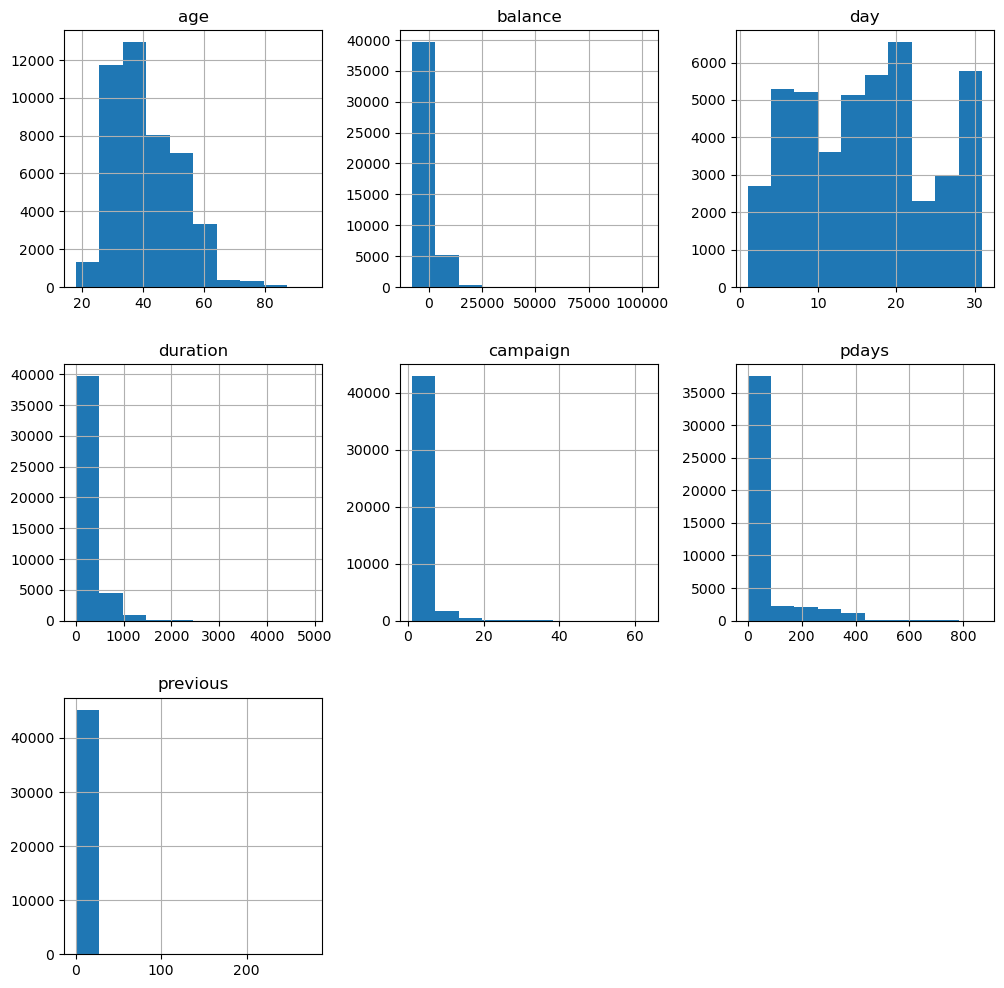

In [86]:
# Distribution for each column
df.hist(figsize = (12,12))
plt.show()

- semua data terdistribusi miring, beberapa di antaranya tidak memiliki variance yang tinggi seperti balance, duration, campaign, pdays, dan previous
- terdapat distribusi negatif yang cukup banyak bila diperhatikan di plot balance, akan dicek apakah nilai tersebut termasuk ke dalam mayoritas client atau tidak

In [152]:
# Meliihat unique value dari pdays
print (df['pdays'].unique())
print ("Indeks dimana pdays bernilai 0 :", np.where(df['pdays']==0))

[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259
 241 260 234 251 225 161 237 262 248 255 220 227 206 224 249 235 228 263
   2 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 271 203
 221 202 216 201 257 229 210 217  75 213  73  76 267 211 215  77 236  82
   6 209 274   1 243 212 275  80 276   9 279  12 280  88 277  85  84 219
  24  21 282  41 294  49 329 307 303 331 308 300  64 314 287 330 332 302
 323 318 333  60 326 335 313 312 305 325 327 336 30

Tidak ada nilai 0, diasumsikan bahwa nilai -1 menandakan bahwa nasabah masih aktif dihubungi hingga data diambil. Nilai ini akan dibiarkan disini, namun akan di-handle saat melakukan feature scaling

In [91]:
# Impute target with binary value of y column
df['target']=df['y'].apply(lambda x: 1 if x=='yes' else 0)

print ('target yes = ',df.loc[df['y']=='yes']['target'].unique())
print ('target no = ',df.loc[df['y']=='no']['target'].unique())

target yes =  [1]
target no =  [0]


<Axes: >

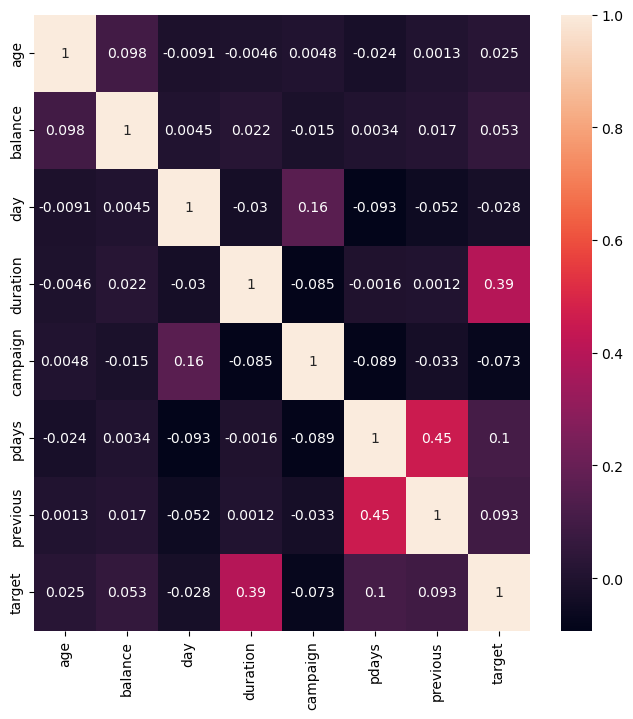

In [36]:
#Check the correlations

corr = df.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True)

Tidak terdapat korelasi yang tinggi antar fitur sehingga tidak perlu dilakukan reduksi dimensi dan seleksi fitur dari kolom numerikal.

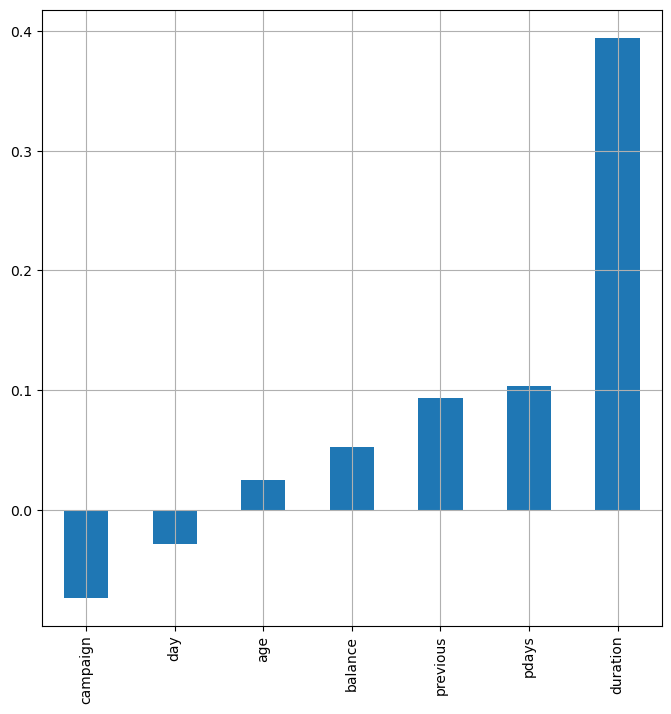

In [28]:
# Plot of correlation for each feature to the default payment
plt.figure(figsize=(8,8))
corr['target'][:-1].sort_values().plot(kind='bar')
plt.grid(True)

Semua fitur memiliki korelasi yang bisa diterima untuk dijadikan fitur untuk memprediksi target (apakah pelanggan berlangganan deposit atau tidak).

### Cardinality And Duplication Check

In [42]:
# Viewing all the unique values in categorical dtype
for i in (df.select_dtypes(include='object').columns):
    print (i, ":",df[i].unique())
    print ("Count of Unique Values :",df[i].nunique(),'\n')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Count of Unique Values : 12 

marital : ['married' 'single' 'divorced']
Count of Unique Values : 3 

education : ['tertiary' 'secondary' 'unknown' 'primary']
Count of Unique Values : 4 

default : ['no' 'yes']
Count of Unique Values : 2 

housing : ['yes' 'no']
Count of Unique Values : 2 

loan : ['no' 'yes']
Count of Unique Values : 2 

contact : ['unknown' 'cellular' 'telephone']
Count of Unique Values : 3 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Count of Unique Values : 12 

poutcome : ['unknown' 'failure' 'other' 'success']
Count of Unique Values : 4 

y : ['no' 'yes']
Count of Unique Values : 2 



Job and month mempunyai cardinality yang tinggi, selain itu dalam kolom job, terdapat beberapa kategori yang sebetulnya mungkin masih merupakan kategori yang sama namun ditulis dengan menggunakan nama yg berbeda (duplikasi). Selanjutnya kami akan memeriksa kesamaan antara kelas dalam 2 kolom ini untuk mengurangi cardinality.

Menurut website resources for employers, didapat bahwa beberapa jenis pekerjaan dapat disatukan menjadi berikut :
- blue collar and technician termasuk blue collar
- management dan admin adalah white collar
- unemployed dan student sama-sama tidak bekerja
- unknown adalah missing value
- kategori selebihnya akan dibiarkan seperti yang ada

In [555]:
# categorize the education by the level of education
job_cat=[]
for i in range (df.shape[0]):    
    if ((df['job'][i] == "blue-collar") | (df['job'][i] == "technician")):
        job_cat.append('blue_collar')
    elif ((df['job'][i] == "management") | (df['job'][i] == "admin.")):
        job_cat.append('white_collar')
    elif ((df['job'][i] == 'unemployed')| (df['job'][i] == 'student')):
        job_cat.append("unemployed")
    else:
        job_cat.append(df['job'][i])
df['job_cat']=job_cat
print ("Job Category :",df['job_cat'].unique())
print ("Count of Unique Values without unknown category:",df['job_cat'].nunique()-1)

Job Category : ['white_collar' 'blue_collar' 'entrepreneur' 'unknown' 'retired'
 'services' 'self-employed' 'unemployed' 'housemaid']
Count of Unique Values without unknown category: 8


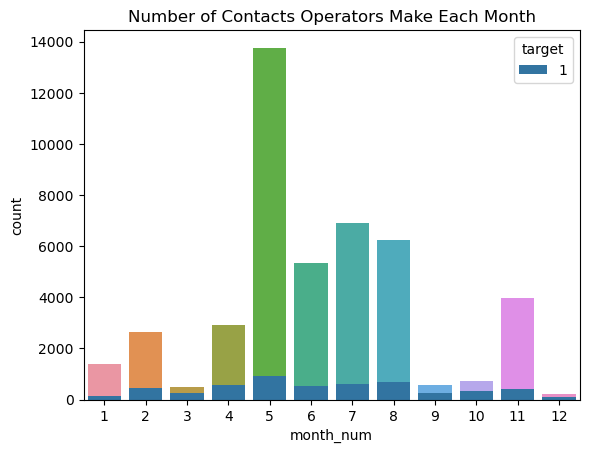

In [578]:
# Labelling the month into month_num
df['month_num'] = df['month'].apply(lambda x: datetime.strptime(x, '%b').month)
sns.countplot(x=df['month_num'])
sns.countplot(x = 'month_num', hue = 'target', data = df.loc[df['target']==1])
plt.title("Number of Contacts Operators Make Each Month")
plt.show()

- Bulan 5 adalah bulan dimana operator paling aktif menghubungi nasabah
- Bulan 1,2,4,6,7,8, dan 11 merupakan bulan saat operator sering menghubungi nasabah
- Bulan 3,9,10,12 merupakan bulan saat operator tidak aktif menghubungi nasabah

Akan ditambah kolom baru untuk mengkategorikan kolom bulan aktif dan kurang aktif.

In [95]:
# categorize the education by the level of education
active_month=[]
for i in range (df.shape[0]):    
    if (df['month_num'][i] in [1,2,4,6,7,8]):
        active_month.append('active')
    elif df['month_num'][i]==5:
        active_month.append('most_active')
    else:
        active_month.append('less_active')
df['active_month']=active_month
print ("Month Categpry :",df['active_month'].unique())
print ("Count of Unique Values :",df['active_month'].nunique())

Month Categpry : ['most_active' 'active' 'less_active']
Count of Unique Values : 3


### Explore The Data

<Axes: title={'center': 'Clients Subscribed The Term Deposit'}, ylabel='y'>

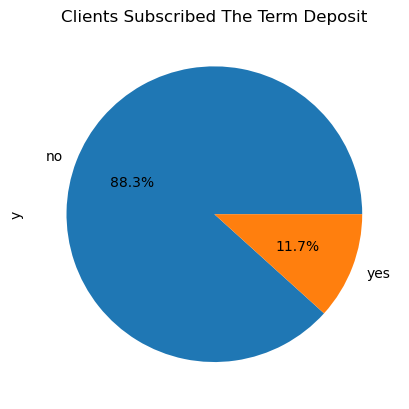

In [30]:
#Check the distribution of clients, categorized by target who subsribed the term deposit
df['y'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Clients Subscribed The Term Deposit')

Ada ketimpangan distribusi dalam target kami. Lebih banyak nasabah yang tidak mengambil deposito berjangka.

<Axes: ylabel='job_cat'>

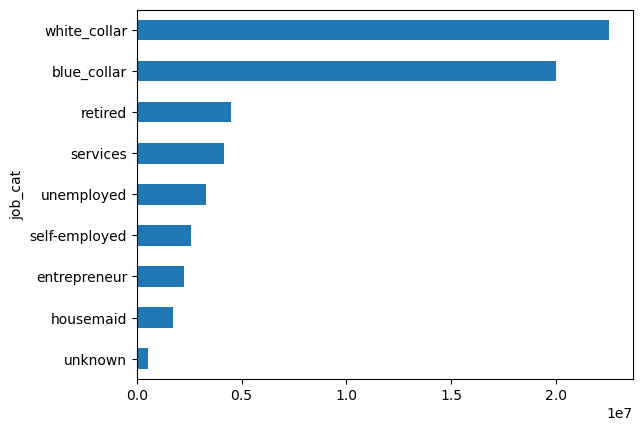

In [81]:
# Sort the balance by job categories
df.groupby('job_cat')['balance'].sum().sort_values().plot(kind='barh')

- Pekerjaan yang memiliki balance yang tinggi adalah white_collar dan blue_collar
- Housemaid adalah pekerjaan yang memiliki balance paling rendah
- Unknown category pada job category diduga sebagai missing data

<Axes: ylabel='job_cat'>

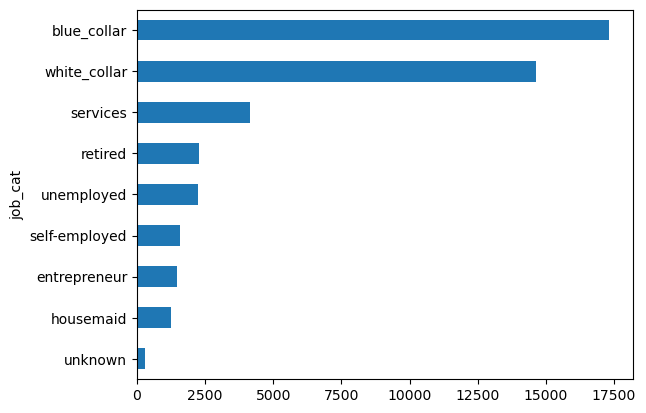

In [82]:
# Sort the loan by job categories
df.groupby('job_cat')['loan'].count().sort_values().plot(kind='barh')

- Pekerjaan yang memiliki personal loan yang tinggi adalah blue_collar and white_collar. Diduga nasabah yang bekerja di bidang ini juga mengelola uang dengan jumlah yang besar sehingga cashflow yang didapat juga memiliki range yang lebih besar daripada pekerjaan lain.
- Housemaid adalah pekerjaan yang memiliki loan paling rendah

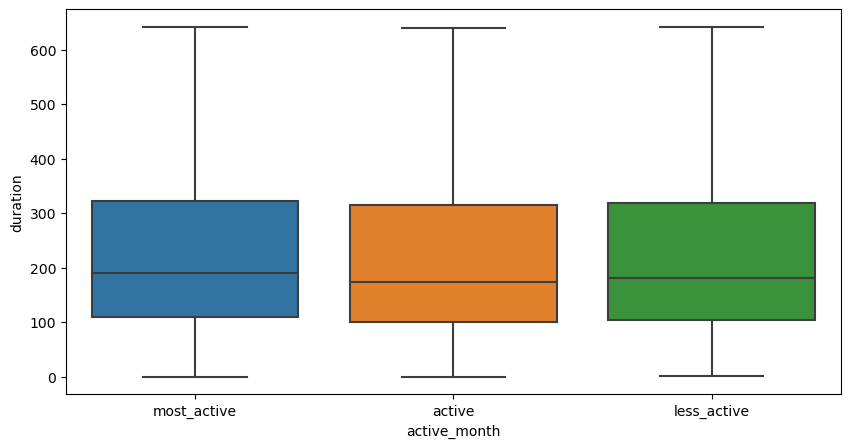

In [107]:
#Check how many samples we have with default and no-default cases categorized by sex
plt.figure(figsize=[10, 5])
sns.boxplot(x = 'active_month', y = 'duration', data = df, showfliers = False)
plt.show()

Setiap bulannya, durasi operasi telemarketing tidak memiliki perbedaan secara signifikan.

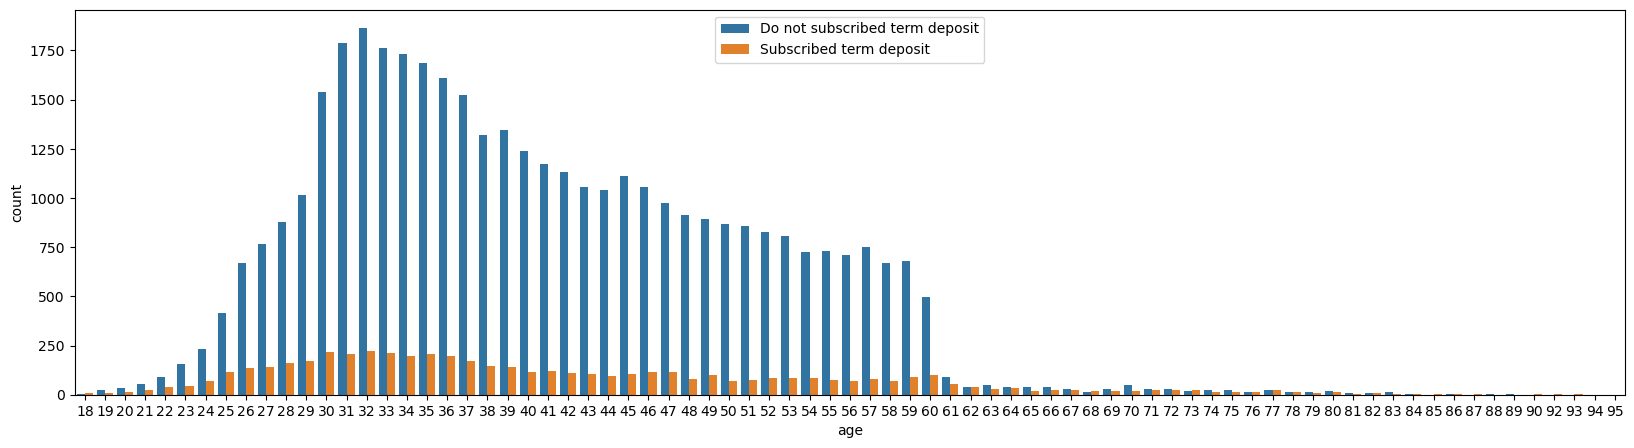

In [35]:
#Check how many samples we have with default and no-default cases categorized by sex
plt.figure(figsize=[20, 5])
ax=sns.countplot(x = 'age', hue = 'target', data = df)
ax.legend(labels = ['Do not subscribed term deposit', 'Subscribed term deposit'])
plt.show()

- Lebih banyak nasabah berumur 23 hingga 60 tahun dalam persebaran umur nasabah
- Nasabah yang berlangganan deposito jangka panjang lebih banyak pada umur 25-47 tahun dibanding di umur lainnya. Umur 25 hingga 40 merupakan umur produktif manusia pada umumnya sehingga, nasabah pada umur rentang ini tentu memiliki kemungkinan berlangganan deposito dibandingkan rentang umur di bawahnya (masa sekolah) dan di atasnya (masa pensiunan).

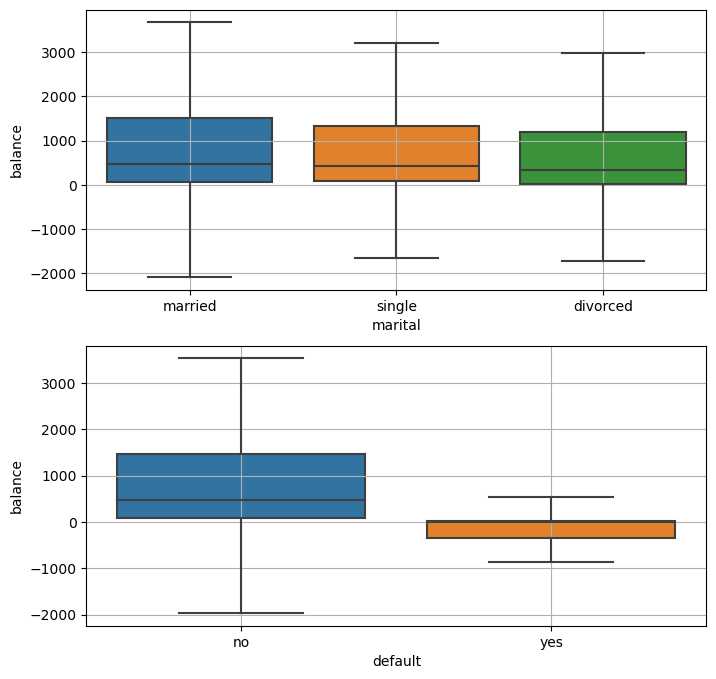

In [542]:
# Plot Balance terhadap perbedaan marital_status dan default payment status

plt.figure(figsize=[8,8])
plt.subplot(211)
plt_mar=sns.boxplot(x = 'marital', y = 'balance', data = df, showfliers = False)
plt.grid(True)

plt.subplot(212)
plt_edu=sns.boxplot(x = 'default', y = 'balance', data = df, showfliers = False)
plt.grid(True)

plt.show()

- Nasabah yang sudah menikah memiliki range balance yang lebih besar dibandingkan dengan yang single dan cerai. Nasabah yang sudah menikah diduga memiliki kebutuhan yang lebih banyak sehingga balancenya memiliki rentang yang lebih besar.
- Nasabah yang tidak gagal bayar memiliki range balance yang lebih besar dibandingkan dengan nasabah yang melakukan gagal bayar. Nasabah yang tidak gagal bayar diduga mempunyai sistem cashflow yang lebih  baik daripada yang tidak gagal bayar, sehingga mereka dapat mengatur keuangan lebih baik dengan balance yang lebih besar. 
- Diduga nasabah yang melakukan gagal bayar credit card, tidak memiliki cashflow yang baik sehingga ketika supplier dari nasabah melakukan withdraw, balance dari nasabah ini kurang dan mengakibatkan saldonya negatif, dan bisa juga berdampak ke kebiasaan gagal bayar dari nasabah ini saat membayar tagihan credit card bulanan

<Axes: xlabel='duration', ylabel='y'>

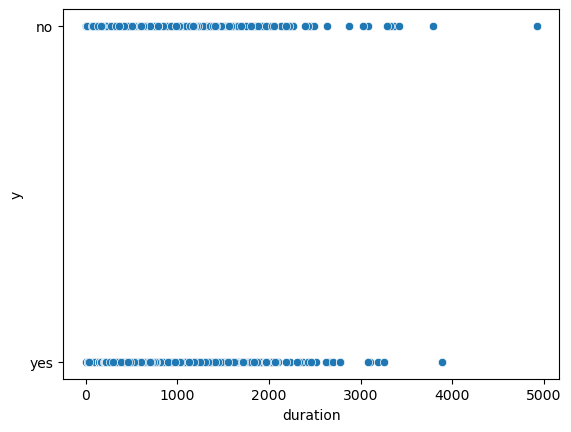

In [545]:
# Plot scatter duration vs target
sns.scatterplot(data=df, x='duration', y="y")

In [553]:
print ("Apakah nasabah berlangganan deposito saat durasi penelpon = 0 ?", df.loc[df['duration']==0]['y'].unique()[0])

Apakah nasabah berlangganan deposito saat durasi penelpon = 0 ? no


- Sebagian besar durasi telemarketing berjalan berada di angka kurang dari 3000 detik atau 50 menit (default durasi nasabah dihubungi pihak bank)
- Semakin lama nasabah dihubungi (di atas 3000 detik), maka semakin besar kemungkinan bahwa nasabah tersebut berlangganan deposito.

Sebelum masuk ke feature engineering, akan dicek lagi nilai dari numerikal dan kategorikal terdiri dari apa saja yang harus diubah menjadi nan value (karena kesalahan input atau unknown category)

In [128]:
# Viewing all the unique values in categorical dtype
for i in (df.select_dtypes(include='object').columns):
    print (i, ":",df[i].unique())
    print ("Count of Unique Values :",df[i].nunique(),'\n')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Count of Unique Values : 12 

marital : ['married' 'single' 'divorced']
Count of Unique Values : 3 

education : ['tertiary' 'secondary' 'unknown' 'primary']
Count of Unique Values : 4 

default : ['no' 'yes']
Count of Unique Values : 2 

housing : ['yes' 'no']
Count of Unique Values : 2 

loan : ['no' 'yes']
Count of Unique Values : 2 

contact : ['unknown' 'cellular' 'telephone']
Count of Unique Values : 3 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Count of Unique Values : 12 

poutcome : ['unknown' 'failure' 'other' 'success']
Count of Unique Values : 4 

y : ['no' 'yes']
Count of Unique Values : 2 

job_cat : ['white_collar' 'blue_collar' 'entrepreneur' 'unknown' 'retired'
 'services' 'self-employed' 'unemployed' 'housemaid']
Count of Unique Values : 9 

active_month : ['most_active' 'act

Kecuali job dan month, semua kategori unknown akan diimputasi dengan nilai nan.

In [163]:
# Replacing the unknown code categories and minus pdays with nan value
df['education'].replace('unknown',np.nan, inplace=True)
df['contact'].replace('unknown',np.nan, inplace=True)
df['poutcome'].replace('unknown',np.nan, inplace=True)
df['job_cat'].replace('unknown',np.nan, inplace=True)

## Feature Engineering

### Feature Selection

In [164]:
# The percentage of missing value in each column
print ("Percentage of missing value :")
df.isnull().mean()*100

Percentage of missing value :


age              0.000000
job              0.000000
marital          0.000000
education        4.107407
default          0.000000
balance          0.000000
housing          0.000000
loan             0.000000
contact         28.798301
day              0.000000
month            0.000000
duration         0.000000
campaign         0.000000
pdays            0.000000
previous         0.000000
poutcome        81.747805
y                0.000000
month_num        0.000000
job_cat          0.637013
target           0.000000
active_month     0.000000
dtype: float64

- Pada kolom contact dan poutcome, terdapat missing value yang sangat besar persentasenya, yakni 28.8% dan 81.74%
- Fttur contact tidak terlalu berpengaruh terhadap telemarketing sehingga kolom ini akan dibuang
- Fitur poutcome berguna untuk klasifikasi client namun tidak terdapat cukup data untuk dimasukkan ke dalam model sehingga kolom ini akan dibuang

### Split between X (features) and y (target)

In [165]:
# Splitting between `X` and `y`

# Get the prepared data to be used in features only 
# drop the month and job with high cardinality, contact, target, and drop the target
X = df.drop(['job', 'month', 'y', 'target', 'contact', 'poutcome'], axis=1)
y = df['target']

In [166]:
# Split the train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Handling Missing Value

In [167]:
# The percentage of missing value in each column
print ("Percentage of missing value :")
X_train.isnull().mean()*100

Percentage of missing value :


age             0.000000
marital         0.000000
education       4.089250
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
day             0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
month_num       0.000000
job_cat         0.646981
active_month    0.000000
dtype: float64

Missing value kurang dari 5%, sehingga akan di-handle dengan cara impute dari nilai median dan mode.

Sebelumnya akan dipisah terlebih dahulu kolom numerikal dan kategorikal. Untuk kolom binary seperti default, housing, dan loan akan didefinisikan sebagai kolom ordinal untuk mengurangi banyak kolum ketika di-encode.

In [372]:
# Define the data type column
num_cols=['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
nom_cat_cols=['marital', 'job_cat']
ord_cat_cols=['education', 'default', 'housing', 'loan','active_month']

# Split the X based on the column type

X_train_num = X_train[num_cols]
X_train_cat_nom = X_train[nom_cat_cols]
X_train_cat_ord = X_train[ord_cat_cols]

X_test_num = X_test[num_cols]
X_test_cat_nom = X_test[nom_cat_cols]
X_test_cat_ord = X_test[ord_cat_cols]

In [373]:
# Define the imputer for numeric and categoric cases
imputer_num = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_cat1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_num.fit(X_train_num)
imputer_cat1.fit(X_train_cat_nom)
imputer_cat2.fit(X_train_cat_ord)

# Impute the missing value with median and mode
# Index ter-reset
X_train_num=pd.DataFrame(imputer_num.transform(X_train_num), columns=X_train_num.columns.values)
X_train_cat_nom=pd.DataFrame(imputer_cat1.transform(X_train_cat_nom), columns=X_train_cat_nom.columns.values)
X_train_cat_ord=pd.DataFrame(imputer_cat2.transform(X_train_cat_ord), columns=X_train_cat_ord.columns.values)

# Impute missing value in test data
# Index ter-reset
X_test_num=pd.DataFrame(imputer_num.transform(X_test_num), columns=X_test_num.columns.values)
X_test_cat_nom=pd.DataFrame(imputer_cat1.transform(X_test_cat_nom), columns=X_test_cat_nom.columns.values)
X_test_cat_ord=pd.DataFrame(imputer_cat2.transform(X_test_cat_ord), columns=X_test_cat_ord.columns.values)

print ("Percentage of missing value :")
print (X_train_num.isnull().mean()*100)
print (X_train_cat_nom.isnull().mean()*100)
print (X_test_cat_ord.isnull().mean()*100)

Percentage of missing value :
age         0.0
balance     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
dtype: float64
marital    0.0
job_cat    0.0
dtype: float64
education       0.0
default         0.0
housing         0.0
loan            0.0
active_month    0.0
dtype: float64


### Handling Outlier

age
% Upper Outlier for age : 1.08%
% Lower Outlier for age : 0.00%
Skewness of age : 0.68%


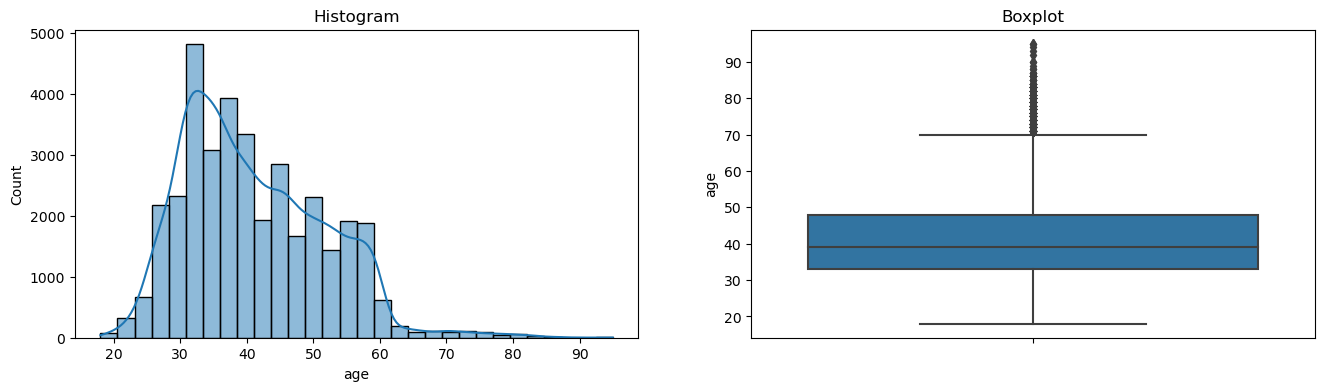

balance
% Upper Outlier for balance : 10.47%
% Lower Outlier for balance : 0.03%
Skewness of balance : 8.56%


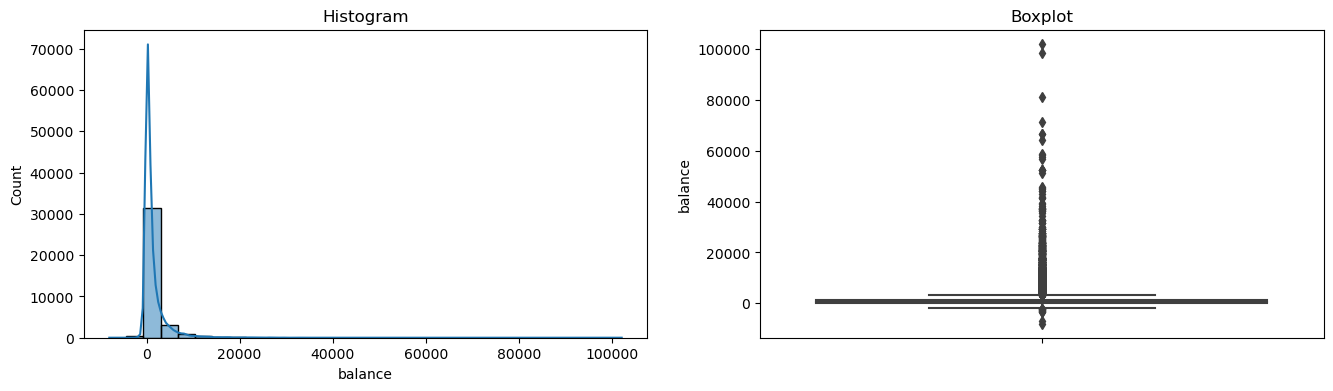

day
% Upper Outlier for day : 0.00%
% Lower Outlier for day : 0.00%
Skewness of day : 0.10%


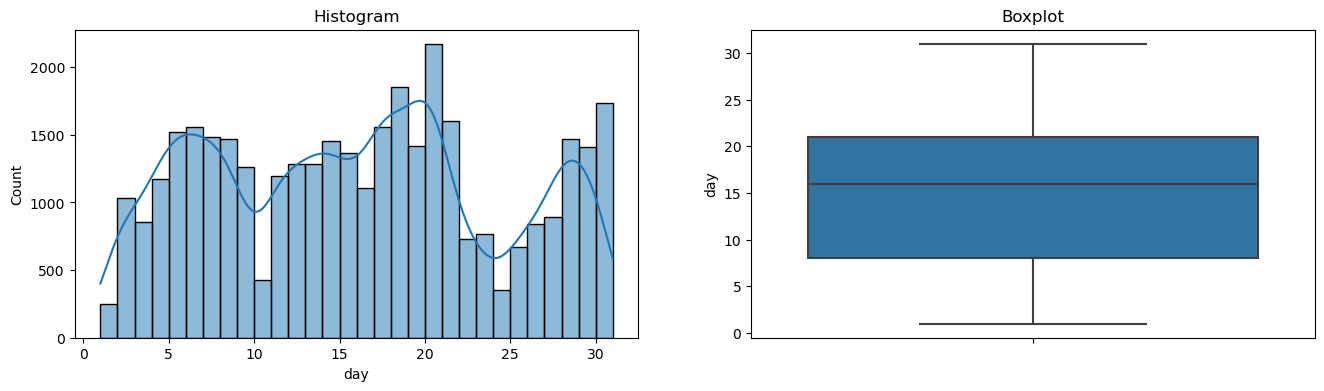

duration
% Upper Outlier for duration : 7.24%
% Lower Outlier for duration : 0.00%
Skewness of duration : 3.22%


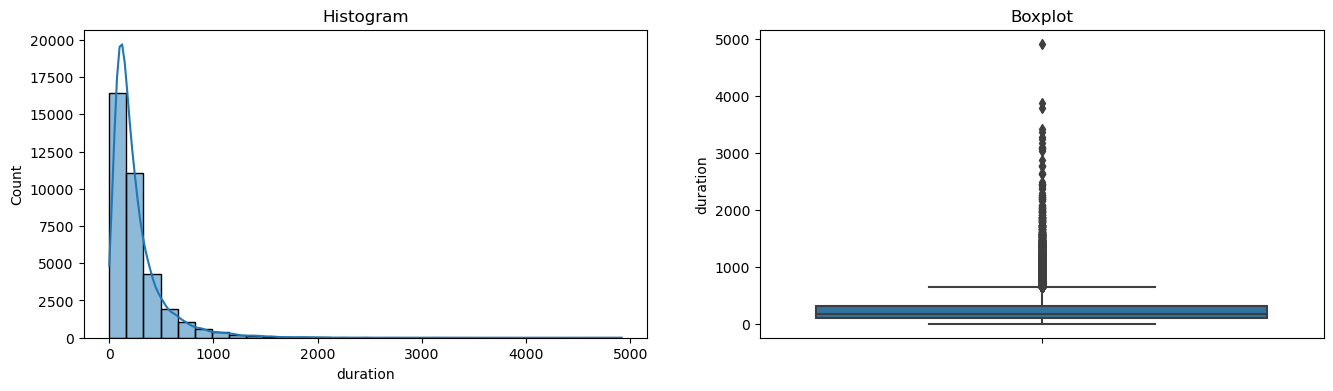

campaign
% Upper Outlier for campaign : 6.72%
% Lower Outlier for campaign : 0.00%
Skewness of campaign : 4.88%


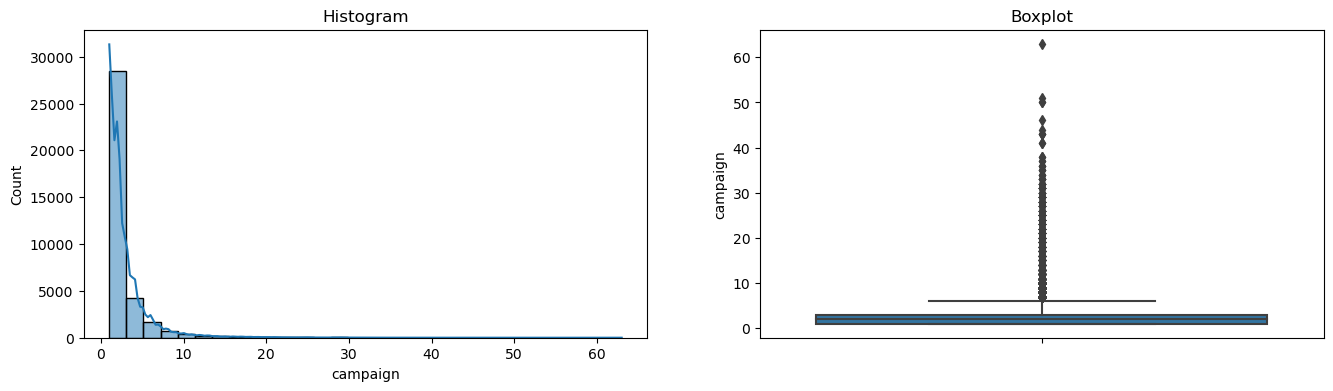

pdays
% Upper Outlier for pdays : 18.27%
% Lower Outlier for pdays : 0.00%
Skewness of pdays : 2.61%


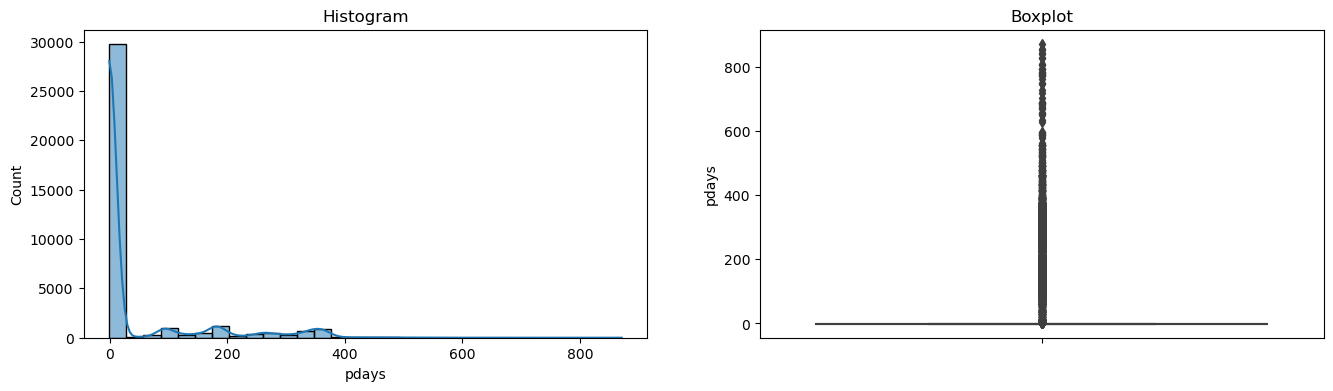

previous
% Upper Outlier for previous : 18.27%
% Lower Outlier for previous : 0.00%
Skewness of previous : 45.82%


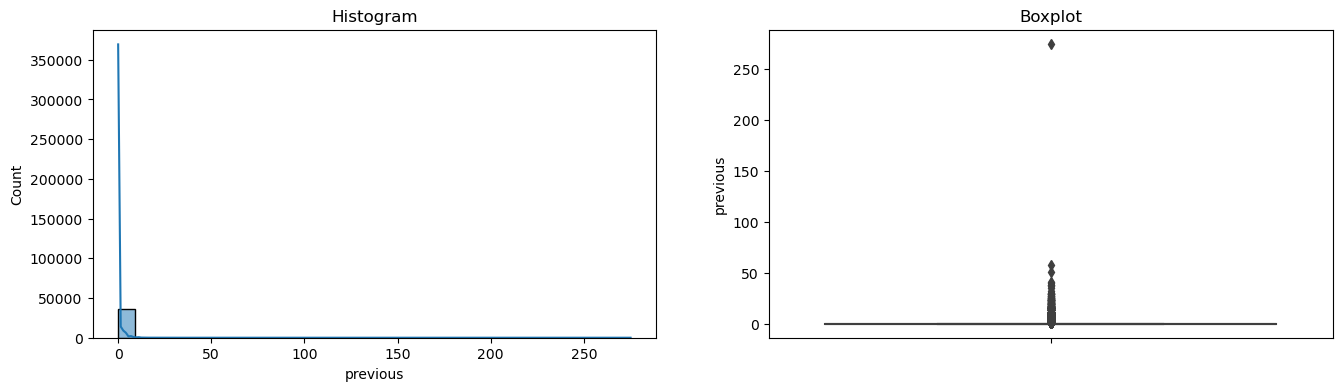

In [375]:
# Check the outlier in train data
for i in X_train_num.columns.values:
    globals()['Upper_'+i], globals()['Lower_'+i]=outlier_func.find_skewed_boundaries(X_train_num, i, 1.5,
                                                                                     X_train_num[i].skew())
    upper=globals()['Upper_'+i]
    lower=globals()['Lower_'+i]
    
    out_u=(len(X_train_num[X_train_num[i] > upper])/len(X_train_num) * 100)
    out_l=(len(X_train_num[X_train_num[i] < lower])/len(X_train_num) * 100)
    
    print(i)
    print('% Upper Outlier for '+i+' : {:.2f}%'.format(out_u))
    print('% Lower Outlier for '+i+' : {:.2f}%'.format(out_l))
    print('Skewness of '+i+' : {:.2f}%'.format(X_train_num[i].skew()))
    outlier_func.diagnostic_plots(X_train_num, i)
        

In [558]:
# Check if the clients was not previously contacted (value=999)
X_train_num['pdays'].max()

871

- Kolom age memiliki outlier kurang dari 5% (akan di-trim)
- Kolom day tidak memiliki outlier (tidak dihandle)
- Kolom balance, duration, campaign
- Kolom pdays tidak terdapat nasabah yang tidak pernah dikontak sebelumnya
- Kolom pdays, dan previous memiliki variance yang sangat kecil, diduga ini merupakan natural outlier sehingga tidak akan dilakukan handling outlier

#### Trimming the outlier less than 5%

In [376]:
# Flag the outliers
for i in ['age']:
    globals()['outliers_'+i] = np.where(X_train_num[i] > globals()['Upper_'+i], True,
                       np.where(X_train_num[i] < globals()['Lower_'+i], True, False))

# Let's trimm the dataset
X_train_num_trimmed = X_train_num.loc[~(outliers_age)]
print('Rows dataset - Before trimming : ', X_train_num.shape[0])
print('Rows dataset - After trimming  : ', X_train_num_trimmed.shape[0])

Rows dataset - Before trimming :  36168
Rows dataset - After trimming  :  35776


Lakukan juga pemangkasan data pada data kategorikal dan y_train sesuai indeks data X_train_num.

In [455]:
# Reset index and get the new index to be trimmed
y_train.reset_index(drop=True, inplace=True)
X_train_cat_nom.reset_index(drop=True, inplace=True)
X_train_cat_ord.reset_index(drop=True, inplace=True)

# Drop the index column in y_train and other x_train
y_train_final=pd.DataFrame(data=y_train, index=X_train_num_trimmed.index.values)
X_train_cat_nom_trimmed = pd.DataFrame(data=X_train_cat_nom, index=X_train_num_trimmed.index.values)
X_train_cat_ord_trimmed = pd.DataFrame(data=X_train_cat_ord, index=X_train_num_trimmed.index.values)
y_train_final.shape, X_train_cat_nom_trimmed.shape, X_train_cat_ord_trimmed.shape

((35776, 1), (35776, 2), (35776, 5))

#### Capping the outlier greater than 5%

In [456]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['balance','duration', 'campaign'])

windsoriser.fit(X_train_num_trimmed)

X_train_num_capped = windsoriser.transform(X_train_num_trimmed)
X_test_num_capped = windsoriser.transform(X_test_num)

### Feature Scaling

- Kolom day yang memiliki skewness kurang dari 0.5 akan di-scaling menggunakan StandardScaller
- Kolom age, balance, duration, campaign yang memiliki skewness lebih dari 0.5 akan di-scaling menggunakan MinMaxscaler
- Kolom pdays dan previous yang tidak di-handle outlier-nya akan di-scaling menggunakan RobustScaler

In [379]:
# Define the numerical columns to be scaled with different scaler
num_cols_norm=['day']
num_cols_skew=['age', 'balance', 'duration', 'campaign']
num_cols_rob=['pdays', 'previous']

In [380]:
# Split Train-Set and Test-set based on Column Types

X_train_num_norm = X_train_num_capped[num_cols_norm]
X_train_num_skew = X_train_num_capped[num_cols_skew]
X_train_num_rob = X_train_num_capped[num_cols_rob]

X_test_num_norm = X_test_num_capped[num_cols_norm]
X_test_num_skew = X_test_num_capped[num_cols_skew]
X_test_num_rob = X_test_num_capped[num_cols_rob]

In [381]:
# Define the scaler
Stdscaler = StandardScaler().fit(X_train_num_norm)
MMscaler = MinMaxScaler().fit(X_train_num_skew)
RBscaler = RobustScaler().fit(X_train_num_rob)

#Transform the the numerical train data
X_train_num_norm_scaled = pd.DataFrame(Stdscaler.transform(X_train_num_norm), columns=num_cols_norm)
X_train_num_skew_scaled = pd.DataFrame(MMscaler.transform(X_train_num_skew), columns=num_cols_skew)
X_train_num_rob_scaled = pd.DataFrame(RBscaler.transform(X_train_num_rob), columns=num_cols_rob)

#Transform the numerical test data
X_test_num_norm_scaled = pd.DataFrame(Stdscaler.transform(X_test_num_norm), columns=num_cols_norm)
X_test_num_skew_scaled = pd.DataFrame(MMscaler.transform(X_test_num_skew), columns=num_cols_skew)
X_test_num_rob_scaled = pd.DataFrame(RBscaler.transform(X_test_num_rob), columns=num_cols_rob)

### Resampling The Imbalance Dataset

In [467]:
# Reset index and get the new index to be trimmed
y_train_final.reset_index(drop=True, inplace=True)
X_train_cat_nom_trimmed.reset_index(drop=True, inplace=True)
X_train_cat_ord_trimmed.reset_index(drop=True, inplace=True)

In [383]:
# Concate the imbalance X data
X_train_imbalanced=pd.concat([X_train_num_norm_scaled,X_train_num_skew_scaled,X_train_num_rob_scaled,
                             X_train_cat_nom_trimmed, X_train_cat_ord_trimmed], axis=1)
X_train_imbalanced.head(3)

,day,age,balance,duration,campaign,pdays,previous,marital,job_cat,education,default,housing,loan,active_month
0,0.024156,0.326923,0.614326,0.289289,0.0,331.0,1.0,single,white_collar,tertiary,no,yes,no,active
1,-0.456499,0.788462,0.388670,0.869429,0.2,288.0,13.0,married,white_collar,secondary,no,yes,no,most_active
2,-0.937155,0.673077,0.695974,0.103206,0.2,0.0,0.0,married,white_collar,tertiary,no,yes,no,most_active


In [521]:
# Concate the imbalance X data
X_test_imbalanced=pd.concat([X_test_num_norm_scaled,X_test_num_skew_scaled,X_test_num_rob_scaled,
                             X_test_cat_nom, X_test_cat_ord], axis=1)
X_test_imbalanced.isnull().mean()

day             0.0
age             0.0
balance         0.0
duration        0.0
campaign        0.0
pdays           0.0
previous        0.0
marital         0.0
job_cat         0.0
education       0.0
default         0.0
housing         0.0
loan            0.0
active_month    0.0
dtype: float64

In [523]:
# SMOTE-NC
smotenc = SMOTENC([7, 8, 9,10,11,12,13], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced, y_train_final)
y_train_balanced.value_counts()

target
0         31724
1         31724
dtype: int64

## Building The Pipeline

__Feature Encoding__
- Data kategorikal nominal, marital dan job_cat, akan di-encode menggunakan OneHotEncoder
- Data kategorikal ordinal,yaitu education, dan active_month, akan di-encode menggunakan OrdinalEncoder
- Data binary, yakni default, housing, dan loan, akan di-encode menggunakan OrdinalEncoder

In [449]:
# Define the data type column
nom_cat_cols=['marital', 'job_cat']
ord_cat_cols=['education', 'default', 'housing', 'loan','active_month']


ohe_pipeline = Pipeline(
    steps=[
        ("ohe_enc", OneHotEncoder(handle_unknown="ignore")),
    ]
)

ode_pipeline = Pipeline(
    steps=[
        ("ode_enc", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1,
                    categories=[['primary', 'secondary', 'tertiary'],
                                ['no', 'yes'],['no','yes'], ['no','yes'],
                               ['less_active','active','most_active']])),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat_nom", ohe_pipeline, nom_cat_cols),
        ("cat_ord", ode_pipeline, ord_cat_cols),
                  
    ]
)

## Model Definition
Pada pemodelan kali ini, digunakan 4 dari model classifier yang umum dijumpai yang ada di scikit-learn, yaitu :
- Logistic Reegression
- KNN
- Decision Tree Classifier
- Gaussian Naive Bayes

In [526]:
# Define the models with pipeline
logreg_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

knn_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)

dt_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

nb_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GaussianNB())]
)

## Model Training

In [527]:
# Train the models with pipeline

logreg_pipe.fit(X_train_balanced, y_train_balanced)
knn_pipe.fit(X_train_balanced, y_train_balanced)
dt_pipe.fit(X_train_balanced, y_train_balanced)
nb_pipe.fit(X_train_balanced, y_train_balanced)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_norm',
                                                  Pipeline(steps=[('norm_scaler',
                                                                   StandardScaler())]),
                                                  ['day']),
                                                 ('num_skew',
                                                  Pipeline(steps=[('skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('num_rob',
                                                  Pipeline(steps=[('rob_scaler',
                                                                   RobustScaler())]),
           

## Model Evaluation

Pada evaluasi model kali ini, kami ingin `memaksimalkan target nasabah` yang akan diberikan metode telemarketing untuk menyampaikan promosi yang sedang berjalan, sehingga kami tidak ingin kehilangan potensi adanya nasabah yang tidak masuk ke dalam program telemarketing karena diprediksikan tidak berlangganan deposito `**(False Negative)**` dan `tidak ingin juga memperbanyak sumber daya pemasaran` dengan adanya prediksi nasabah yang berlangganan deposito namun ternyata tidak berlangganan `**(False Positive)**`. Maka metric yang tepat untuk menggambarkan kondisi ini adalah f1-score. Kami tidak menggunakan akurasi karena akurasi dapat menyebabkan bias dan misleading ketika dihadapi dengan data yang imbalanced.

In [528]:
# Check the performance of the models using f1-score ans save the f1-score value in df_eval

models=['logreg','dt','knn','nb']
df_eval=pd.DataFrame(columns=['model','f1_train_mean','f1_test','f1_train_std'])
for i in models:
    model_tmp=globals()[i+'_pipe']
    print (globals()[i+'_pipe'])
    globals()['f1_train_'+i]=cross_val_score(model_tmp, 
                                           X_train_balanced, 
                                           y_train_balanced, 
                                           cv=5,
                                           scoring='f1')
    globals()['y_pred_test_'+i]=model_tmp.predict(X_test_imbalanced)
    globals()['f1_test_'+i]=f1_score(y_test, globals()['y_pred_test_'+i])
    
    tmp=pd.DataFrame([{'model':str((globals()[i+'_model'].__class__.__name__)),
                      'f1_train_mean':globals()['f1_train_'+i].mean(),
                      'f1_test':globals()['f1_test_'+i],
                      'f1_train_std':globals()['f1_train_'+i].std()}])
    
    df_eval=df_eval.append(tmp)
    
df_eval.sort_values('f1_test', ascending=False)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_norm',
                                                  Pipeline(steps=[('norm_scaler',
                                                                   StandardScaler())]),
                                                  ['day']),
                                                 ('num_skew',
                                                  Pipeline(steps=[('skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('num_rob',
                                                  Pipeline(steps=[('rob_scaler',
                                                                   RobustScaler())]),
           

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_norm',
                                                  Pipeline(steps=[('norm_scaler',
                                                                   StandardScaler())]),
                                                  ['day']),
                                                 ('num_skew',
                                                  Pipeline(steps=[('skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('num_rob',
                                                  Pipeline(steps=[('rob_scaler',
                                                                   RobustScaler())]),
           

,model,f1_train_mean,f1_test,f1_train_std
0,LogisticRegression,0.838471,0.473954,0.023556
0,KNeighborsClassifier,0.887287,0.419322,0.036974
0,DecisionTreeClassifier,0.873692,0.414421,0.046108
0,GaussianNB,0.728658,0.246949,0.028593


Berdasarkan hasil metric table yang didapat, `model terbaik adalah LogisticRegression`, namun nilai f1-score memperlihatkan bahwa `model overfit`, yakni hanya bagus memprediksi saat latihan, tidak baik untuk memprediksi data test, selanjutnya akan dicek klasifikasi report dari model ini untuk melihat kelebihan dan kelemahan model.

In [529]:
# Classification report of LogisticRegression model
y_pred_train_logreg_pipe = logreg_pipe.predict(X_train_balanced)
y_pred_test_logreg_pipe = logreg_pipe.predict(X_test_imbalanced)
print('f1 Score - Test Set Logistic Regression Train: ', f1_score(y_train_balanced, y_pred_train_logreg_pipe))
print('f1 Score - Test Set Logistic Regression Test : ', f1_score(y_test, y_pred_test_logreg_pipe))
print('Classification Report Logistic Regression : \n', classification_report(y_test, y_pred_test_logreg_pipe), '\n')

f1 Score - Test Set Logistic Regression Train:  0.8412750065857778
f1 Score - Test Set Logistic Regression Test :  0.4739536284251732
Classification Report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88      7985
           1       0.35      0.74      0.47      1058

    accuracy                           0.81      9043
   macro avg       0.65      0.78      0.68      9043
weighted avg       0.89      0.81      0.83      9043
 



Nilai presisi target=1 (nasabah berlangganan deposito) yang kurang dari 50% menggambarkan bahwa `model masih sering melakukan kesalahan saat memprediksi nasabah yang berlangganan deposito`. Lebih banyak nasabah yang diprediksikan berlangganan namun sebetulnya tidak (False Positive). Akibatnya, sumber daya untuk pemasaran tidak dilakukan kepada target yang sesuai, yakni ke target yang sebetulnya tidak berlangganan deposito, ini dapat menjadi kelemahan model.
\
\
Nilai recall dari target=1 yang lebih dari 50% melihatkan bahwa `model sudah dapat mengurangi potensi adanya nasabah yang terprediksi berlangganan deposito padahal sebetulnya tidak`. Sebaliknya, model jarang memprediksikan bahwa nasabah adalah nasabah yang tidak berlangganan deposito (False Negative). Akibatnya, kita tidak kehilangan potensi untuk mendapatkan target nasabah yang diinginkan. Ini dapat menjadi kelebihan model

__Kesimpulan__ :
- Model terbaik adalah LogisticRegression dengan score test 0.47
- Hasi model menggambarkan nilai yang overfit, artinya model lebih baik memprediksi saat train dibandingkan dengan test
- Kelebihan model adalah model sudah dapat mengurangi potensi kehilangan target nasabah yang dicari
- Kelemahan model adalah model belum dapat memaksimalkan reduksi target yang sesuai sehingga akibatnya sumber daya pemasaran menjadi tidak efektif
- Akan dilakukan tuning terhadap model terbaik dengan menggunakan hyperparameter tuning

## Model Improvement

Akan dilakukan hyperparameter tuning pada model terbaik yakni LogisticRegression. Sebelum itu, dilakukan encoding terlebih dahulu ke data X_train scaled yang sudah di-resample agar data X_train dapat digunakan secara konsisten pada tuning model kali ini.

In [533]:
# Define the X_train_transformed using pipeline
# Transform the X_train_balanced with encoder
X_train_pipe = Pipeline(steps=[('preprocessor', preprocessor)]).fit_transform(X_train_balanced)

In [537]:
%%time
#Create a dictionary and fill out some parameters for kernels, C and gamma
grid_parameters = {'dual': [False, True], 'C':[0.1,0.5,1,2,100,1000],'fit_intercept':[True],
                   'intercept_scaling': [1,2,3], 'class_weight': ['balanced',None],
                   'random_state':[0],'solver':['lbfgs','liblinear','sag','saga','newton-cholesky']}

grid = GridSearchCV(LogisticRegression(),grid_parameters,verbose=3, refit=True,scoring ='f1', 
                    cv = 5, return_train_score=True, n_jobs=-1
                    ) 
grid.fit(X_train_pipe, y_train_balanced)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
CPU times: total: 9.44 s
Wall time: 5min 24s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 100, 1000],
                         'class_weight': ['balanced', None],
                         'dual': [False, True], 'fit_intercept': [True],
                         'intercept_scaling': [1, 2, 3], 'random_state': [0],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                    'newton-cholesky']},
             return_train_score=True, scoring='f1', verbose=3)

In [539]:
# get best parameters from model improvement
grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'random_state': 0,
 'solver': 'lbfgs'}

Best params menurut GridSearch akan digunakan saat retrain model di bawah.

In [540]:
# Define the new model with pipeline
logreg_model1 = LogisticRegression(C=0.1,class_weight='balanced',dual=False,fit_intercept=True,intercept_scaling=1,
                                 random_state=0,solver='lbfgs')

logreg_pipe_tuned = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logreg_model1)]
)


# Retrain model with new parameter from hyperparameter tuning method
logreg_pipe_tuned.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_norm',
                                                  Pipeline(steps=[('norm_scaler',
                                                                   StandardScaler())]),
                                                  ['day']),
                                                 ('num_skew',
                                                  Pipeline(steps=[('skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('num_rob',
                                                  Pipeline(steps=[('rob_scaler',
                                                                   RobustScaler())]),
           

In [541]:
%%time

# Check new f1-score
f1_train_logreg1 = cross_val_score(logreg_pipe_tuned, 
                                           X_train_balanced, 
                                           y_train_balanced, 
                                           cv=5, 
                                           scoring='f1')
y_pred_test_logreg1 = logreg_pipe_tuned.predict(X_test_imbalanced)

print('f1 Score - All - Cross Validation  Before Tuning : ', f1_train_logreg)
print('f1 Score - Mean - Cross Validation Before Tuning : ', f1_train_logreg.mean())
print('f1 Score - Std - Cross Validation Before Tuning  : ', f1_train_logreg.std())
print('f1 Score - Test Set Before Tuning                : ', f1_score(y_test, y_pred_test_logreg), '\n')
print ('\n')
print('f1 Score - All - Cross Validation  After Tuning : ', f1_train_logreg1)
print('f1 Score - Mean - Cross Validation After Tuning : ', f1_train_logreg1.mean())
print('f1 Score - Std - Cross Validation  After Tuning : ', f1_train_logreg1.std())
print('f1 Score - Test Set After Tuning                : ', f1_score(y_test, y_pred_test_logreg1), '\n')

# Check pervormance Model against Test-Set
print('Classification Report Logistic Regression : \n', classification_report(y_test, y_pred_test_logreg1), '\n')

f1 Score - All - Cross Validation  Before Tuning :  [0.7915817  0.84920147 0.84993095 0.84732532 0.85431379]
f1 Score - Mean - Cross Validation Before Tuning :  0.8384706456264241
f1 Score - Std - Cross Validation Before Tuning  :  0.023556202333482042
f1 Score - Test Set Before Tuning                :  0.4739536284251732 



f1 Score - All - Cross Validation  After Tuning :  [0.79257269 0.84927091 0.84944751 0.84761322 0.85409471]
f1 Score - Mean - Cross Validation After Tuning :  0.838599808610458
f1 Score - Std - Cross Validation  After Tuning :  0.023114388927541047
f1 Score - Test Set After Tuning                :  0.4341655716162944 

Classification Report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88      7985
           1       0.35      0.74      0.47      1058

    accuracy                           0.81      9043
   macro avg       0.65      0.78      0.68      9043
weighted avg       0.89      0.81

- Model masih overfit
- Nilai f1-score setelah dilakukan tuning tidak memperlihatkan hasil yang memuaskan, sebaliknya malah menurun
- Hasil model tuning tidak lebih baik daripada sebelum di-improve
- Akan digunakan model sebelum tuning untuk di-deploy

__Kesimpulan__ :\
Model yang dihasilkan baik dari base model maupun setelah di-tuning tidak memperlihatkan hasil yang cukup memuaskan. Hal ini dapat disebabkan oleh adanya ketimpangan dalam distribusi data nasabah. Terdapat 88% nasabah yang tidak berlangganan deposito, yang artinya hanya 11% dari total semua nasabah yang terdata, yang akan menjadi target market kami.

\
__Saran__ :\
Untuk mendapatkan model yang lebih robust, dapat dilakukan cara-cara seperti :
- Tidak melakukan generate data untuk membuat data lebih balance, sebaiknya dapat dilakukan pendataan ulang terhadap semua nasabah yang ada di Bank Portugal untuk mendapatkan target nasabah yang memang betul-betul berlangganan deposito berjangka
- Bisa dilakukan resampling dengan cara undersampling, untuk melatih model agar hanya fokus kepada data yang asli
- Apabila setelah didata kembali semua profil nasabah dan masih didapati distribusi yang imbalance, maka model dapat dilakukan tuning dengan mengatur threshold agar dapat mengurangi prediksi false positive

## Model Saving

In [582]:
# Save the Files

import pickle
import json

with open('m2/imputer_num.pkl', 'wb') as file_1:
    pickle.dump(imputer_num, file_1)
    
with open('m2/imputer_cat1.pkl', 'wb') as file_2:
    pickle.dump(imputer_cat1, file_2)

with open('m2/imputer_cat2.pkl', 'wb') as file_3:
    pickle.dump(imputer_cat2, file_3)
    
with open('m2/windsoriser.pkl', 'wb') as file_4:
    pickle.dump(windsoriser, file_4)
    
with open('m2/Stdscaler.pkl', 'wb') as file_8:
    pickle.dump(Stdscaler, file_8)
    
with open('m2/MMscaler.pkl', 'wb') as file_8:
    pickle.dump(MMscaler, file_8)

with open('m2/RBscaler.pkl', 'wb') as file_8:
    pickle.dump(RBscaler, file_8)

with open('m2/ohe_pipeline.pkl', 'wb') as file_8:
    pickle.dump(ohe_pipeline, file_8)
    
with open('m2/ode_pipeline.pkl', 'wb') as file_8:
    pickle.dump(ode_pipeline, file_8)

with open('m2/preprocessor.pkl', 'wb') as file_9:
    pickle.dump(preprocessor, file_9)  
    
with open('m2/logreg_pipe.pkl', 'wb') as file_9:
    pickle.dump(logreg_pipe, file_9)  
    

with open('m2/num_cols.txt', 'w') as file_5:
    json.dump(num_cols, file_5)

with open('m2/nom_cat_cols.txt','w') as file_6: 
    json.dump(nom_cat_cols, file_6)
    
with open('m2/ord_cat_cols.txt', 'w') as file_7:
    json.dump(ord_cat_cols, file_7) 
    
with open('m2/num_cols_norm.txt', 'w') as file_5:
    json.dump(num_cols_norm, file_5)

with open('m2/num_cols_skew.txt','w') as file_6: 
    json.dump(num_cols_skew, file_6)
    
with open('m2/num_cols_rob.txt', 'w') as file_7:
    json.dump(num_cols_rob, file_7)


In [564]:
# Create random sample to be used in model inference
df_inf=df_ori.sample(n=1)
df_inf.reset_index(drop=True, inplace=True)
df_inf.drop(['y'],axis=1, inplace=True)
df_inf.to_csv('m2/data_inf.csv')

## Conclusion

- Umur rata-rata nasabah berada di sekitar 40 tahun dengan range umur yang berlangganan deposito jangka panjang lebih banyak pada umur 25-47 tahun dibanding di umur lainnya
- Ada beberapa nasabah yang memiliki saldo yang lebih kecil daripada withdrawal yang dilakukan oleh supplier dari nasabah
- Lebih banyak nasabah yang tidak mengambil deposito berjangka.
- Pekerjaan yang memiliki balance dan loan yang tinggi adalah white_collar dan blue_collar sedangkan housemaid adalah pekerjaan yang memiliki balance dan loan paling rendah
- Semakin lama nasabah dihubungi (di atas 50 menit), maka semakin besar kemungkinan bahwa nasabah tersebut berlangganan deposito
- Bulan 5 adalah bulan dimana operator paling aktif menghubungi nasabah
- Bulan 1,2,4,6,7,8, dan 11 merupakan bulan saat operator sering menghubungi the nasabah
- Model terbaik adalah LogisticRegression dengan score test 0.47 dengan performa yang overfit
- Kelebihan model adalah model sudah dapat mengurangi potensi kehilangan target nasabah yang dicari
- Kelemahan model adalah model belum dapat memaksimalkan reduksi target yang sesuai sehingga akibatnya sumber daya pemasaran menjadi tidak efektif
- Setelah dilakukan tuning terhadap hyperparameter model, model masih overfit, belum dapat mengatasi kelemahan model
- Sebaiknya dapat dilakukan pendataan ulang terhadap nasabah Bank Portugal untuk mencari nasabah yang berlangganan deposito, untuk meningkatkan pembelajaran model sehingga dapat memperbaiki performa model

## Reference

- https://resources.workable.com/hr-terms/blue-collar-worker-definition#:~:text=Blue%20collar%20workers%20work%20most,millwright%2C%20assembler%20and%20truck%20driver.